Smallest disurption radius = 0.64 solar radii <=> Period = 1.84 hrs
Largest disurption radius = 2.16 solar radii <=> Period = 11.43 hrs


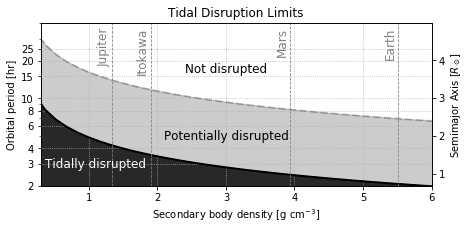

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def disruptionradius(Mwd, rho, C=0.85):
    '''
    Mwd = Mass of white dwarf in solar masses
    Rho = density of asteroid in g cm^-3
    '''
    return C*(Mwd/0.6)**(1./3) * (rho/3.)**(-1./3)

def keplerslaw(a, Mwd):
    '''
    Inputs: a - semimajor axis in meters
            Mwd - mass of white dwarf in solar masses
    '''
    return np.sqrt( (4*np.pi**2)/(6.67e-11*Mwd*2.0e30) * a**3)

def keplerslawinv(p, Mwd):
    '''
    Inputs: period in seconds
            Mwd - mass of white dwarf in solar masses
    '''
    return ( p**2/(4*np.pi**2)*(6.67e-11*Mwd*2.0e30) )**(1./3)


rc_min = disruptionradius(0.6, 7)         # Disrupt bare iron core
rc_max = disruptionradius(0.6, 2, C=1.89) # Disrupt rubble pile asteroid
au2m = 1.5e11
rsun2au = 0.004649
rsun2m = rsun2au*au2m
sec2hrs = 1./(60*60)
print(('Smallest disurption radius = %.2f solar radii <=> Period = %.2f hrs' % (rc_min, keplerslaw(rc_min*rsun2m, 0.6)*sec2hrs)))
print(('Largest disurption radius = %.2f solar radii <=> Period = %.2f hrs' % (rc_max, keplerslaw(rc_max*rsun2m, 0.6)*sec2hrs)))

rhos = np.linspace(0.2, 8, 50)
rc_smalls = [disruptionradius(0.6, density, C=0.85) for density in rhos]
rc_bigs = [disruptionradius(0.6, density, C=1.89) for density in rhos]

p_smalls = [keplerslaw(rc_i*rsun2m, 0.6)*sec2hrs for rc_i in rc_smalls]
p_bigs = [keplerslaw(rc_i*rsun2m, 0.6)*sec2hrs for rc_i in rc_bigs]

fontsize = 12

def plotplanets(axis, height=4.5):
    names = ['Earth','Mars','Jupiter', 'Itokawa']
    densities = [5.51, 3.93, 1.33, 1.9]
    for name, density in zip(names, densities):
        axis.axvline(density, ls="--", color='gray', lw=0.8)
#         offset = -0.018 if name != 'Jupiter' else 0.2
        offset = -0.018
        axis.annotate(name, (density + offset, height + 7), xycoords='data', rotation=90, 
                             va='top', ha='right', fontsize=fontsize, color='gray')

# In[34]:

import matplotlib
# matplotlib.rcParams['font.size'] = 16
fig, ax = plt.subplots(1, figsize=(7, 3))
ax2 = ax.twinx()

ax.semilogy(rhos, p_smalls, 'k',lw=2)
ax.semilogy(rhos, p_bigs, 'k', lw=2, alpha=0.2, ls='--')
ax.fill_between(rhos, 1e-10, p_smalls, color='k', alpha=0.8, zorder=-100)
ax.fill_between(rhos, 1e-10, p_bigs, color='k', alpha=0.2, zorder=-100)
ax.set_yticks([3]+list(range(2, 12, 2))+list(range(15,30,5)))
ax.set_yticklabels([3]+list(range(2, 12, 2))+list(range(15,35,5)))


ax.set_xlabel('Secondary body density [g cm$^{-3}$]')
ax.set_ylabel('Orbital period [hr]')
ax2.set_ylabel('Semimajor Axis [$R_\odot$]')

plotplanets(ax, height=30)
ax.grid(ls=':')

ax.set_xlim([0.3, 6])
ax.set_ylim([2, 40])

annotation_kwargs = dict(textcoords='data', ha='center', va='center', 
                         fontsize=fontsize)
ax.annotate('Tidally disrupted', xy=(1.1,3), color='white', **annotation_kwargs)
ax.annotate('Potentially disrupted', xy=(3,5), color='black', **annotation_kwargs)
ax.annotate('Not disrupted', xy=(3,17), color='black', **annotation_kwargs)

[xmin,xmax,ymin,ymax] = ax.axis()
ax2.set_ylim([keplerslawinv(ymin/sec2hrs, 0.6)/rsun2m, keplerslawinv(ymax/sec2hrs, 0.6)/rsun2m])
ax.set_title('Tidal Disruption Limits')


fig.savefig('plots/disruptionlimits.pdf', bbox_inches='tight')
plt.show()